In [12]:
from logging import warning
import os 
import pandas as pd
import numpy as np
import pickle 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

import warnings

import processing
import event_manager
import epoching 
import model_training

warnings.filterwarnings('ignore')

<h1> Training ML <h1>

In [13]:
file = '../../data/data_model/data_nothreshold_win1s_sftf.pkl'
X, df_label = model_training.structure_data_for_modeling(file,classes=[0,1,2])
print(X.shape)

(99048, 57, 44)


In [14]:
X=X[:,:,::3]
print(X.shape)

(99048, 57, 15)


In [30]:
X_train,X_test,y_train,y_test,df_label = model_training.do_train_test_split_based_onsubject(X,df_label,n_subject=80,reshape_data=True)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(70301, 855) (70301,)
(28747, 855) (28747,)


In [31]:
X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])

0.7097669816654552

In [32]:
df_label[df_label.train_test_split=='train'].label.value_counts()

0    32925
2    25534
1    11842
Name: label, dtype: int64

In [33]:
df_label[df_label.train_test_split=='test'].label.value_counts()

0    13475
1     7738
2     7534
Name: label, dtype: int64

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)

(70301, 370)


In [35]:
classes_weights = model_training.get_class_weight(y_train)
print(classes_weights)

[1.97886055 1.97886055 1.97886055 ... 0.71172868 0.71172868 0.71172868]


In [36]:
logistic = XGBClassifier()
logistic.fit(X_train,y_train,sample_weight=classes_weights)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [37]:
ytest_predict = logistic.predict(X_test)
print(classification_report(y_pred=ytest_predict,y_true=y_test))
print(confusion_matrix(y_pred=ytest_predict,y_true=y_test))

LAST 2
              precision    recall  f1-score   support

           0       0.57      0.57      0.57     13475
           1       0.57      0.45      0.50      7738
           2       0.40      0.49      0.44      7534

    accuracy                           0.51     28747
   macro avg       0.51      0.50      0.50     28747
weighted avg       0.53      0.51      0.52     28747

[[7641 1881 3953]
 [2627 3478 1633]
 [3156  707 3671]]


AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

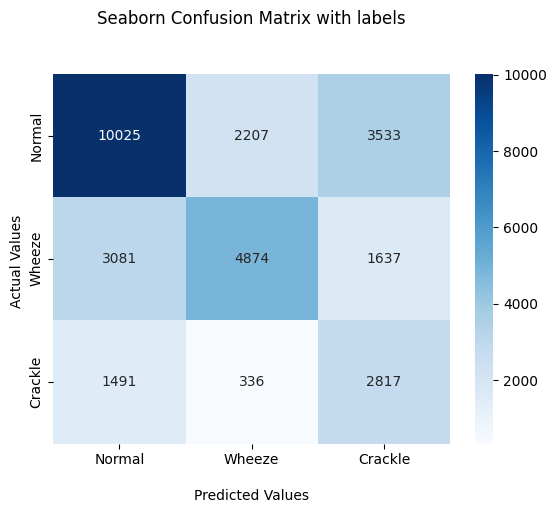

In [13]:
cf_matrix = confusion_matrix(y_pred=ytest_predict,y_true=y_test)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt=".0f")
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Normal','Wheeze','Crackle'])
ax.yaxis.set_ticklabels(['Normal','Wheeze','Crackle'])
cb = ax.colorbar() 
cb.remove() 